In [17]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

path = '../Life_Expectancy_preprocessed_v2.csv'
data = pd.read_csv(path)

numeric_columns = ['Adult Mortality', 'infant deaths', 'Alcohol',
                   'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
                   'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
                   'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
                   'thinness 5-9 years', 'Income composition of resources', 'Schooling',
                   'Developed', 'Life expectancy']

X = data[numeric_columns].values

scaler = StandardScaler()
standardized_feature_matrix = scaler.fit_transform(X)

Explained variance by each component: [0.32264096 0.46989578 0.56299572 0.64498987 0.70591988 0.7502149
 0.79172443 0.82724622 0.85779269 0.88393458 0.90671755 0.92715477
 0.94565594 0.96241063 0.97787147 0.98800627 0.99440675 0.99794691
 0.99988473 1.        ]


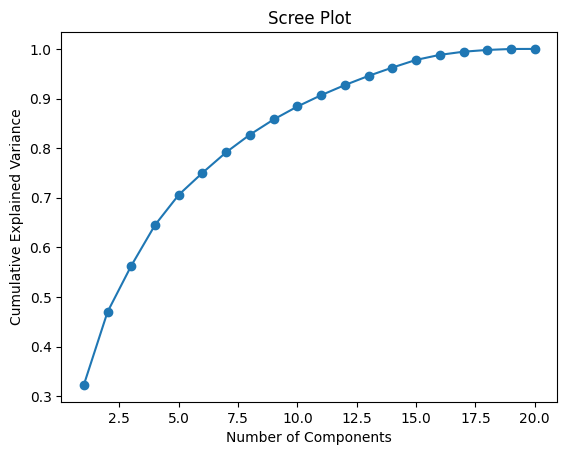

In [18]:
pca = PCA()

pca.fit(standardized_feature_matrix)

explained_variance = pca.explained_variance_ratio_
variance_cumsum = np.cumsum(explained_variance)
print("Explained variance by each component:", variance_cumsum)

plt.plot(range(1, len(variance_cumsum) + 1), variance_cumsum, marker='o')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


In [19]:
threshold = 0.95
num_components = np.argmax(variance_cumsum >= threshold) + 1